In [3]:
# import libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# load client and invoice datasets
client_test = pd.read_csv('data/client_test.csv')
client_train = pd.read_csv('data/client_train.csv', skiprows=4)

invoice_test = pd.read_csv('data/invoice_test.csv')
invoice_train = pd.read_csv('data/invoice_train.csv')

/var/folders/12/q4wqxhts38d3xk830pbsm9kh0000gp/T/ipykernel_3201/353284673.py:6: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_train = pd.read_csv('data/invoice_train.csv')


In [5]:
# inspect client training dataset
client_train.head()

,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [6]:
client_train.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


<Axes: title={'center': 'Distribution of Classifications'}, xlabel='prediction'>

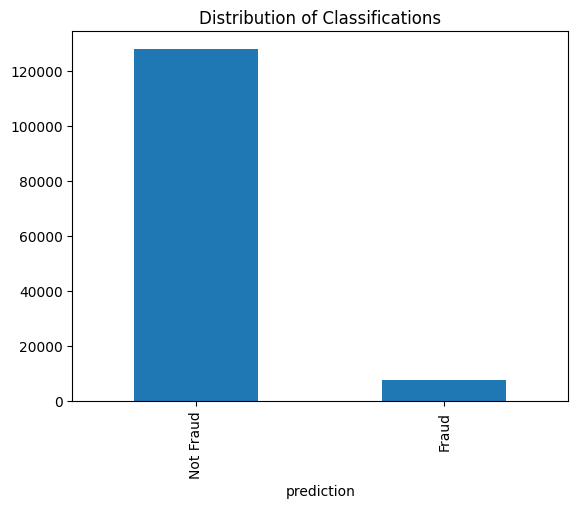

In [7]:
# Create a new column called prediction
client_train['prediction'] = np.where(client_train['target']==1, "Fraud", "Not Fraud")

# Then remove the target column
client_train.drop('target', axis=1, inplace=True)

client_train['prediction'].value_counts().plot(kind = 'bar', title = 'Distribution of Classifications')

Observation: <br>
This bar plot shows the distribution of fraud and non-fraud classifications in the training dataset. The training dataset is imbalanced, with more "Not Fraud" than "Fraud" classifications.

In [8]:
# merge client and invoice training dataset
merged_train = pd.merge(client_train, invoice_train, on='client_id', how='inner')

merged_train.head()

,disrict,client_id,client_catg,region,creation_date,prediction,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,Not Fraud,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,Not Fraud,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,Not Fraud,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC
3,60,train_Client_0,11,101,31/12/1994,Not Fraud,2015-07-13,11,1335667,0,...,8,1,102,0,0,0,14747,14849,4,ELEC
4,60,train_Client_0,11,101,31/12/1994,Not Fraud,2016-11-17,11,1335667,0,...,9,1,572,0,0,0,15066,15638,12,ELEC


In [9]:
merged_train.describe()

,disrict,client_catg,region,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,6.348246e+01,1.194381e+01,2.103584e+02,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,4.109795e+02,1.093225e+02,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,3.273403e+00,6.022452e+00,1.035828e+02,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,7.573080e+02,1.220123e+03,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,6.000000e+01,1.100000e+01,1.010000e+02,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,7.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,2.740000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,6.000000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


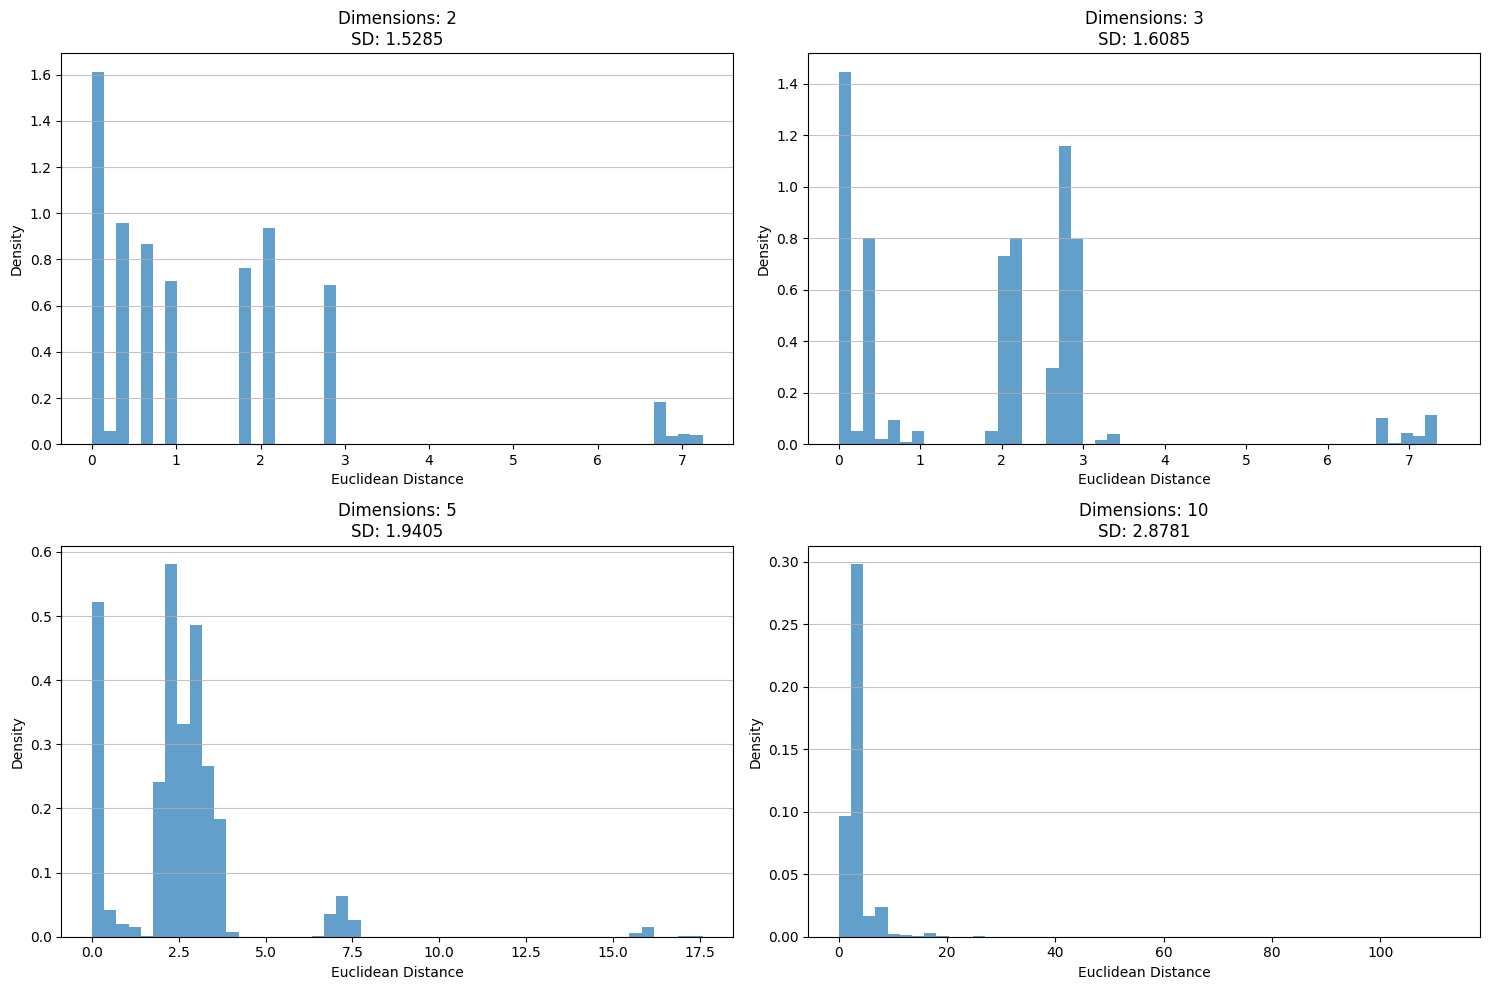

In [32]:
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Use the merged_train dataset and select relevant numerical columns
numeric_columns = [
    'disrict', 'client_catg', 'region', 
    'tarif_type', 'counter_number', 
    'reading_remarque', 'counter_coefficient', 
    'consommation_level_1', 'consommation_level_2',
    'consommation_level_3', 'consommation_level_4',
    'old_index', 'new_index', 'months_number'
]

# Randomly sample a subset of the data (e.g., 10,000 samples)
sample_size = 10000  # Adjust as necessary
merged_sample = merged_train.sample(n=sample_size, random_state=42)

# Standardize the data for better distance computation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(merged_sample[numeric_columns])

# Function to plot histograms for given dimensions
def plot_histograms(data, dimensions, num_bins=50):
    plt.figure(figsize=(15, 10))
    
    for idx, dim in enumerate(dimensions):
        # Calculate Euclidean distances for the specified dimensions
        distances = pairwise_distances(data[:, :dim])
        distance_vector = distances[np.triu_indices(distances.shape[0], k=1)]
        
        # Calculate the standard deviation of distances
        sd = np.std(distance_vector)
        
        # Plot histogram
        plt.subplot(2, 2, idx + 1)
        plt.hist(distance_vector, bins=num_bins, density=True, alpha=0.7)
        plt.title(f'Dimensions: {dim}\nSD: {sd:.4f}')
        plt.xlabel('Euclidean Distance')
        plt.ylabel('Density')
        plt.grid(axis='y', alpha=0.75)

    plt.tight_layout()
    plt.show()

# Define dimensions to explore
dimensions_to_plot = [2, 3, 5, 10] 

# Plot histograms
plot_histograms(scaled_data, dimensions_to_plot)
